# AIPI 590 - XAI | Assignment #06

### Osama Ahmed


![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)
[![View notebooks on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/osama-shawir/Interpretable-ML-Models-II/blob/main/interpretable%20ml%20II.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/osama-shawir/Interpretable-ML-Models-II/blob/main/interpretable%20ml%20II.ipynb)  

In this project, a Random Forest regression model is trained using the California Housing dataset from scikit-learn to predict housing prices. The model is then explained using PD plots, ICE plots, and ALE plots. Each of the plots are interpreted to understand the relationship between the features and the target variable. Microsoft Copilot is used within this notebook to help debug the code when needed and to help organize the markdown writeups and explanations.

**PDP, ICE, and ALE**: These techniques help explain how individual features influence model predictions, offering transparency for complex machine learning models. They vary in how they handle interactions between features and provide either global (PDP) or local (ICE, ALE) insights into feature effects.

- **PDP (Partial Dependence Plot)**: PDP shows the **average effect** of a feature on the model’s predictions across all data points, assuming independence from other features. It provides a **global view**, but it may be misleading if feature interactions exist, as it averages out individual differences.

- **ICE (Individual Conditional Expectation)**: ICE plots display **individual effects** of a feature on each instance’s prediction, capturing variability across instances. Unlike PDP, ICE reveals **heterogeneous effects**, showing how sensitive different predictions are to changes in a feature.

- **ALE (Accumulated Local Effects)**: ALE plots show **local, average effects** of a feature by averaging small changes while accounting for feature interactions. ALE is more robust to correlations between features compared to PDP, and it offers **centered, unbiased effects**, showing how a feature influences predictions across its range.

#### We start by loading the necessary libraries and the dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from alibi.explainers import ALE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load the California Housing dataset
data = fetch_california_housing()

c:\Users\osama\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### We then train a Random Forest regression model on the dataset.

In [2]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Train a RandomForestRegressor model on the entire dataset
X = df.drop("target", axis=1)
y = df["target"]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

#### We then look at the correlation between the features and the target variable to understand the relationship between them before we generate our explanation plots.

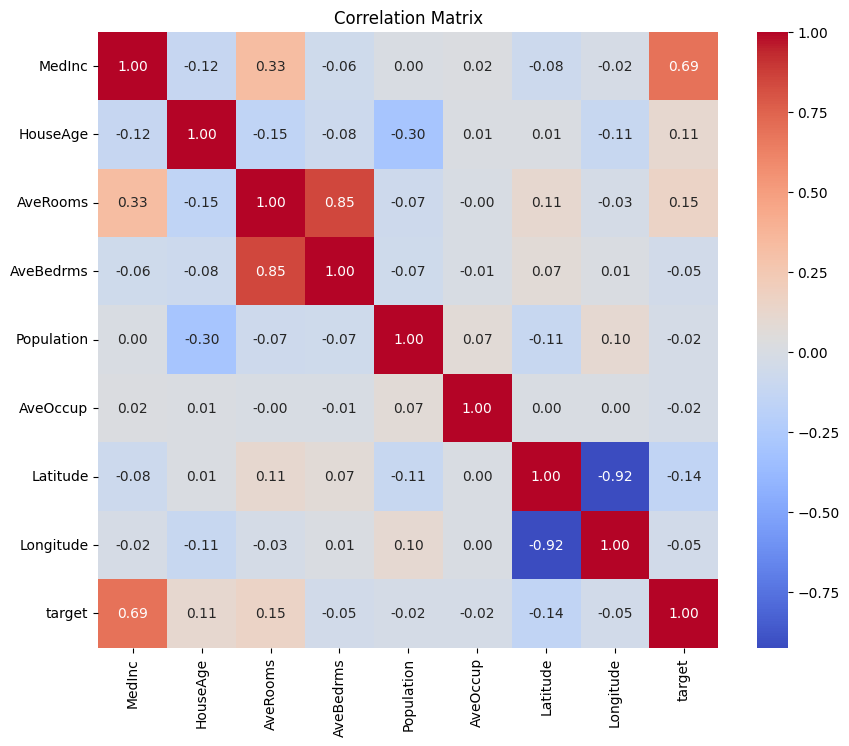

In [5]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### We can see that the highest correlation is between the median income and the target variable, which is expected as the median income is a good indicator of the housing prices. It is followed by the Average number of rooms per household and the House age which are also good indicators of the housing prices.

#### Afterwards we generate the partial dependence plots (PD plots) for these three features to understand the relationship between the features and the target variable.

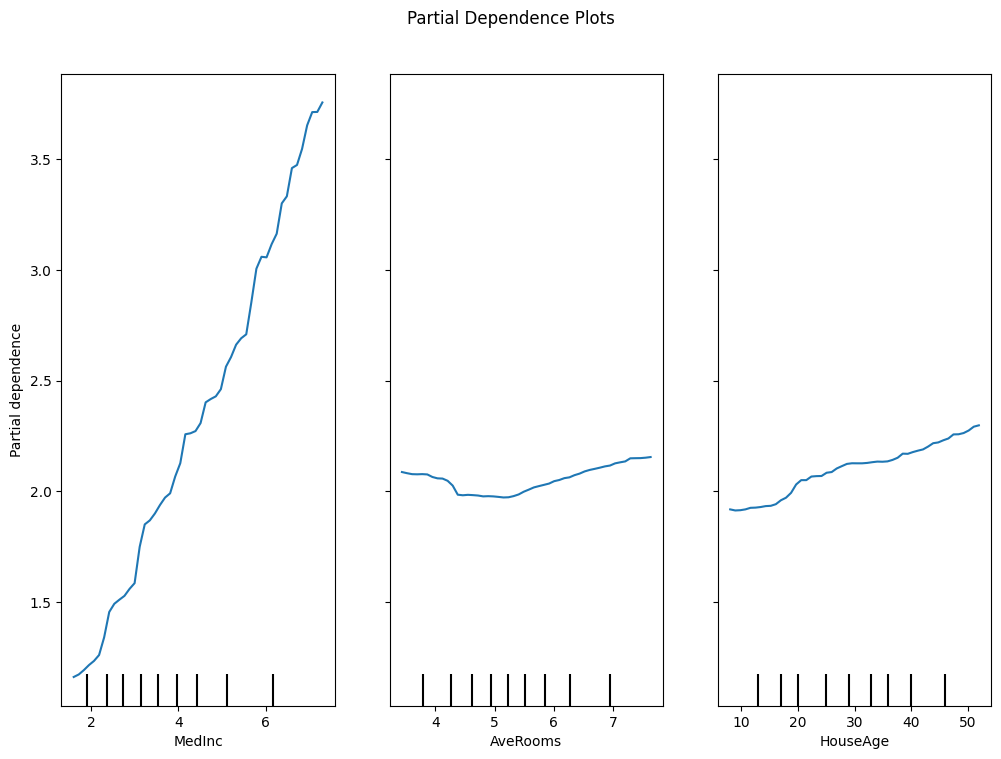

In [11]:
# Select features for PDP
features = ["MedInc", "AveRooms", "HouseAge"]

# Plot PDP
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(model, X, features, ax=ax, grid_resolution=50)
plt.suptitle("Partial Dependence Plots")
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()

### Interpretation of Partial Dependence Plots (PDP)

The Partial Dependence Plots (PDP) provide insights into the relationship between individual features and the target variable (house prices) while averaging out the effects of all other features. Here is the interpretation of the PDPs for the selected features:

- **MedInc (Median Income)**: The PDP for [`MedInc`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fosama%2FDesktop%2FSem%203%2FXAI%2FExplainable%20AI%202.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W2sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A13%7D%7D%5D%2C%22209fd183-8c2b-4bf7-8a84-068681f51f56%22%5D "Go to definition") shows a linear rising trend with a steep slope, indicating that as the median income increases, house prices increase significantly. This suggests a strong positive relationship between median income and house prices.

- **AveRooms (Average Number of Rooms per Household)**: The PDP for [`AveRooms`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fosama%2FDesktop%2FSem%203%2FXAI%2FExplainable%20AI%202.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W2sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A23%7D%7D%5D%2C%22209fd183-8c2b-4bf7-8a84-068681f51f56%22%5D "Go to definition") shows an almost flat, slightly increasing wiggly linear trend, indicating that the average number of rooms per household has a minimal impact on house prices. The slight increase suggests a weak positive relationship, but the effect is not substantial.

- **HouseAge (Age of the House)**: The PDP for [`HouseAge`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fosama%2FDesktop%2FSem%203%2FXAI%2FExplainable%20AI%202.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W2sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A35%7D%7D%5D%2C%22209fd183-8c2b-4bf7-8a84-068681f51f56%22%5D "Go to definition") shows a trend similar to [`AveRooms`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Fosama%2FDesktop%2FSem%203%2FXAI%2FExplainable%20AI%202.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22W2sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A23%7D%7D%5D%2C%22209fd183-8c2b-4bf7-8a84-068681f51f56%22%5D "Go to definition"), with an almost flat, slightly increasing wiggly linear trend. This indicates that the age of the house has a minimal impact on house prices, with a weak positive relationship that is not very significant.

#### Next, we generate the Individual Conditional Expectation (ICE) plots for the same three features to understand the relationship between the features and the target variable at a more granular level for individual observations.

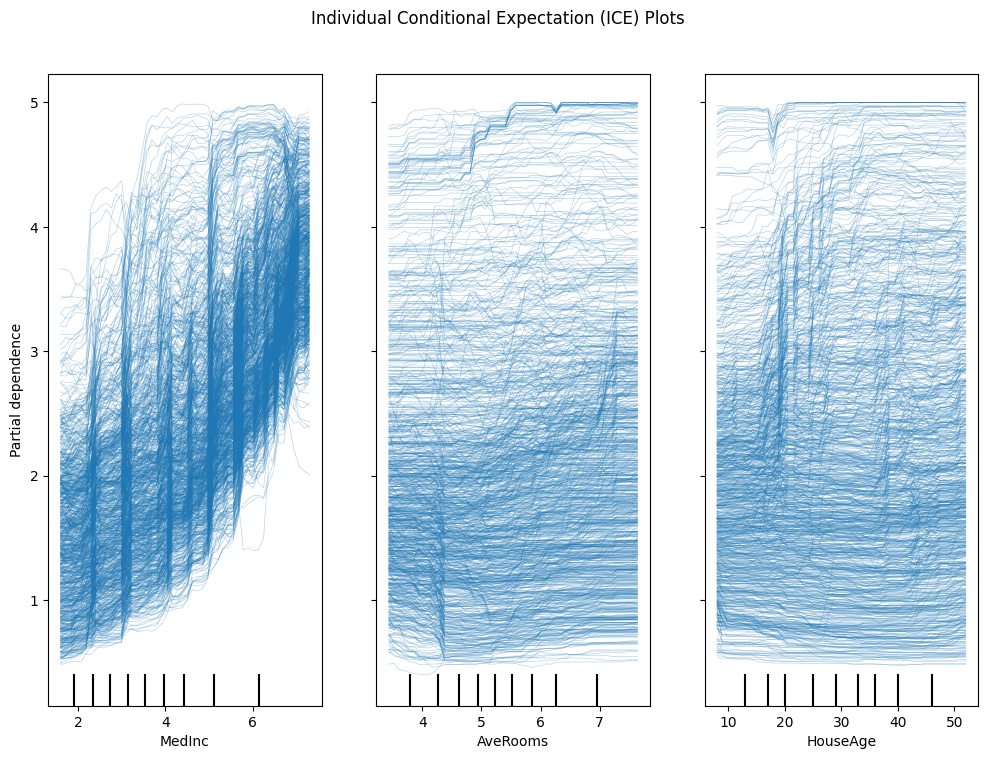

In [12]:
# Plot ICE
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    model, X, features, ax=ax, grid_resolution=50, kind="individual"
)
plt.suptitle("Individual Conditional Expectation (ICE) Plots")
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.show()

### Interpretation of Individual Conditional Expectation (ICE) Plots

The Individual Conditional Expectation (ICE) plots provide insights into the relationship between individual features and the target variable (house prices) for each instance in the dataset. Here is the interpretation of the ICE plots for the selected features:

- **MedInc (Median Income)**: The ICE plots for `MedInc` show that as median income increases, house prices tend to rise consistently across most instances. This indicates a strong positive correlation between median income and house prices, with individual lines generally following an upward trend.

- **AveRooms (Average Number of Rooms per Household)**: The ICE plots for `AveRooms` show that more rooms generally lead to higher predictions, but the effect varies across houses. This indicates a weaker and more inconsistent relationship between the average number of rooms and house prices, with individual lines showing different patterns.

- **HouseAge (Age of the House)**: The ICE plots for `HouseAge` show a mixed effect on house prices. Younger houses have little impact on predictions, while older houses show more variable effects. This suggests that the relationship between house age and house prices is not straightforward and varies across different instances.

#### Finally, we generate the Accumulated Local Effects (ALE) plots for the same three features to understand their localized impact on predictions, while accounting for feature interactions and providing an unbiased, centered view of how each feature affects the model’s output across different regions of its distribution.

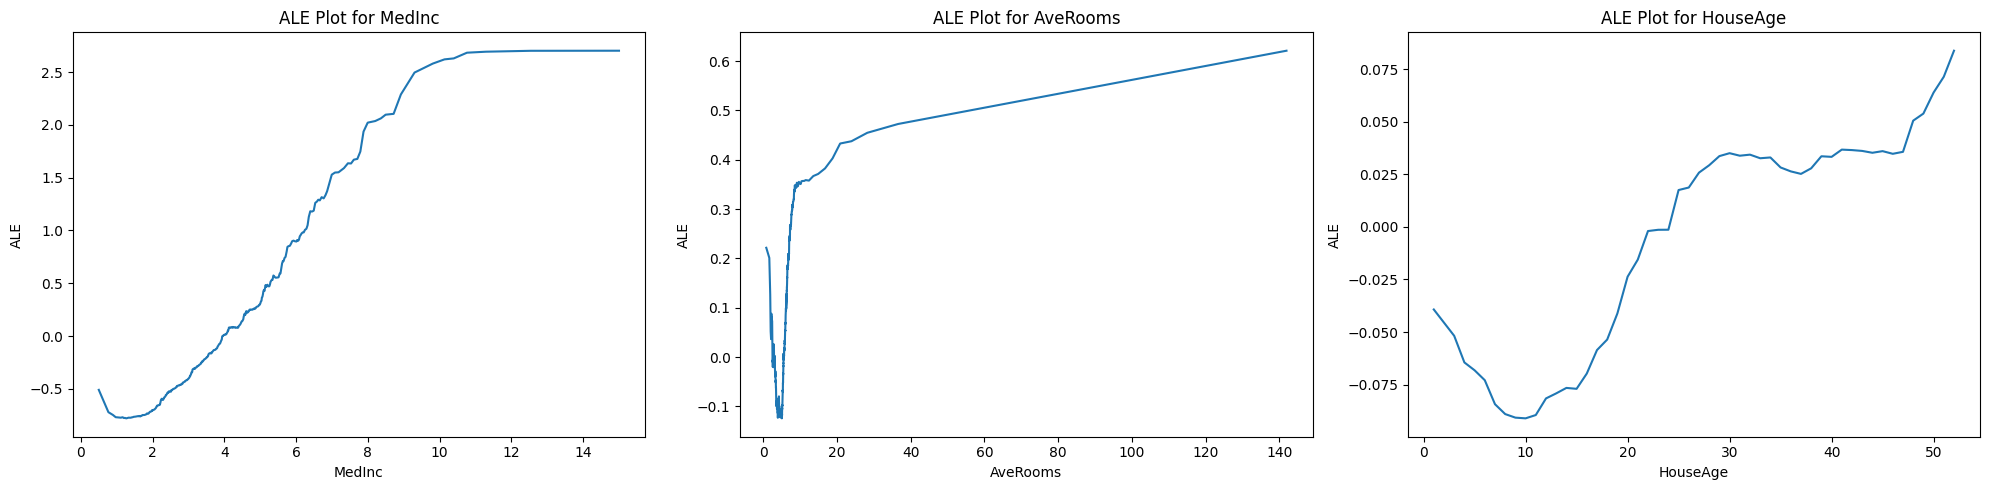

In [13]:
# Initialize the ALE explainer
ale_explainer = ALE(model.predict, feature_names=X.columns.tolist())


# Plot ALE for selected features


features = ["MedInc", "AveRooms", "HouseAge"]


fig, axes = plt.subplots(1, len(features), figsize=(20, 5))


for i, feature in enumerate(features):

    ale_exp = ale_explainer.explain(X.values, features=[X.columns.get_loc(feature)])

    # Extract the ALE values for the feature
    ale_values = ale_exp.ale_values[0]
    feature_values = ale_exp.feature_values[0]

    axes[i].plot(feature_values, ale_values)

    axes[i].set_title(f"ALE Plot for {feature}")

    axes[i].set_xlabel(feature)

    axes[i].set_ylabel("ALE")


plt.tight_layout()


plt.show()

### Interpretation of Accumulated Local Effects (ALE) Plots

**ALE Plot Overview**: Accumulated Local Effects (ALE) plots show the average marginal effect of a feature on the model's predictions, accounting for interactions with other features. The y-axis represents the ALE (effect on prediction), and the x-axis shows the feature values. ALE plots center the feature effect to show relative changes.

- **MedInc (Median Income)**: As median income increases, house prices consistently rise, showing a positive and accelerating effect until around MedInc = 10, after which the effect plateaus. This indicates a strong positive relationship between median income and house prices, with diminishing returns at higher income levels.

- **AveRooms (Average Number of Rooms per Household)**: The effect of average rooms starts negative but turns positive after about 20 rooms, showing an increasing effect as the number of rooms grows. This suggests that larger houses have a positive influence on prices, but the effect is more pronounced for houses with a higher number of rooms.

- **HouseAge (Age of the House)**: The effect of house age is mixed; initially, it decreases house prices for older homes, then slightly increases for houses older than 20 years, with a stronger upward effect for houses older than 40 years. This indicates that while newer homes may be less valuable, older homes, especially those over 40 years old, tend to have a positive impact on house prices.